En este Notebook se exploran funciones de manipulación de imágenes.
Para ello vamos a utilizar varias bibliotecas de python como PIL, cv2 para la maniulación de las imágenes, numpy para los arreglos y matplotlib para graficar.
 

In [2]:
import numpy as np
import imutils
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
%matplotlib inline
import cv2 as cv


Como prueba vamos a cargar una imagen de la carpeta. Primero la vamos a leer con PLT. La función `plt.imread` sirve para cargar la imágen

(1842, 2456, 3)

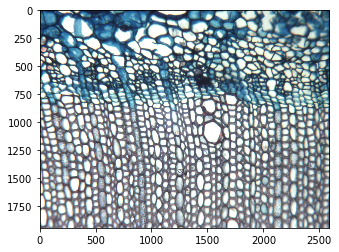

In [3]:
img_1 = plt.imread('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_1_Inicio_10X.jpg')
img_2 = plt.imread('../Data/Pedilanthus/P_tithymaloides/E_tithymaloides_fotos/EPM6_088.tif')
plt.imshow(img_1)
#Se puede crear un arreglo de img_1 con np.asarray
img_1_array = np.asarray(img_1)
img_2_array = np.asarray(img_2)

img_1_array.shape
img_2_array.shape

Veamos algunas características de la imágen. Con un histograma podemos ver la distribución de los valores en los tres canales.

(array([7.600000e+02, 7.753500e+04, 7.150390e+05, 7.257180e+05,
        9.599680e+05, 1.763032e+06, 2.530558e+06, 3.190050e+06,
        1.494018e+06, 2.115178e+06]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

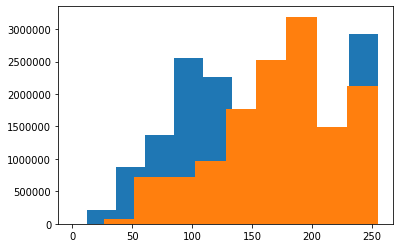

In [4]:
img_1_array.shape
type(img_1_array)
type(img_1)
plt.hist(img_1_array.ravel())
plt.hist(img_2_array.ravel())

(array([7.600000e+02, 7.753500e+04, 7.150390e+05, 7.257180e+05,
        9.599680e+05, 1.763032e+06, 2.530558e+06, 3.190050e+06,
        1.494018e+06, 2.115178e+06]),
 array([  1. ,  26.4,  51.8,  77.2, 102.6, 128. , 153.4, 178.8, 204.2,
        229.6, 255. ]),
 <a list of 10 Patch objects>)

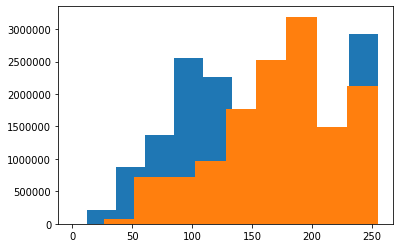

In [5]:
img_1_array.shape
type(img_1_array)
type(img_1)
plt.hist(img_1_array.ravel())
plt.hist(img_2_array.ravel())

Ahora carguemos la imágen con cv2. La función que sirve para leer la imágen es `cv.imread`. Con `cv.split` podemos dividir los canales de la imágen.

(array([ 271626.,  887510., 1456555., 2494389., 2236902., 1478356.,
        1146485., 1072848., 1149221., 2922652.]),
 array([ 14. ,  38.1,  62.2,  86.3, 110.4, 134.5, 158.6, 182.7, 206.8,
        230.9, 255. ]),
 <a list of 10 Patch objects>)

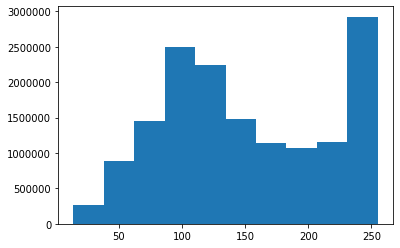

In [6]:
img_cv2 = cv.imread('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_1_Inicio_10X.jpg')
img_cv2.shape
#r,g,b = cv.split(img_cv2)
cv.imshow("img,cv2",img_cv2)
cv.waitKey(1000)
cv.destroyAllWindows()
plt.hist(img_cv2.ravel())


CV2 guarda por default los arreglos en formato BGR, por eso es conveniente hacer una conversión a RGB

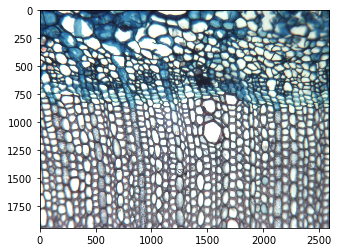

In [7]:
img_cv2=cv.cvtColor(img_cv2, cv.COLOR_BGR2RGB)
plt.imshow(img_cv2)

(array([ 271626.,  887510., 1456555., 2494389., 2236902., 1478356.,
        1146485., 1072848., 1149221., 2922652.]),
 array([ 14. ,  38.1,  62.2,  86.3, 110.4, 134.5, 158.6, 182.7, 206.8,
        230.9, 255. ]),
 <a list of 10 Patch objects>)

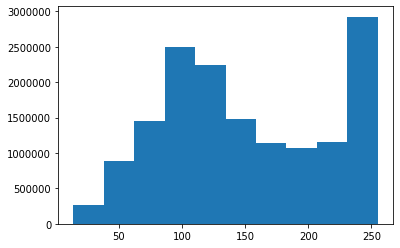

In [8]:
plt.hist(img_cv2.ravel())

Ahora que ya tenemos cargadas las imágenes con diferentes paquetes podemos empezar a hacer transformaciones. Podemos crear un arreglo de la imagen cargada con pil. Se hace una copia de la imágen para poder hacer transformaciones.

Con .convert de plt podemos transformar la imágen a escala de grises

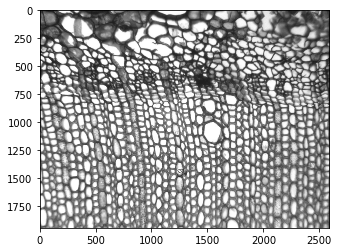

In [9]:
img_gray = Image.open('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_1_Inicio_10X.jpg').convert('L')
plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)


(array([143003., 427206., 744614., 815322., 583110., 387177., 319910.,
        314454., 349962., 954090.]),
 array([ 28. ,  50.7,  73.4,  96.1, 118.8, 141.5, 164.2, 186.9, 209.6,
        232.3, 255. ]),
 <a list of 10 Patch objects>)

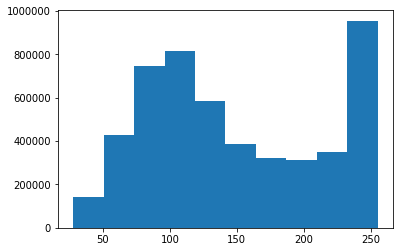

In [10]:
img_gray_arr=np.asarray(img_gray)
plt.hist(img_gray_arr.ravel())

(1944, 2592, 3)

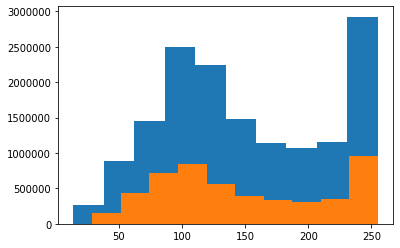

In [11]:
#Intentar convertir el arreglo de escal de grises de pil a cv2.
#Se transformo el de cv2
img_gray_arr=np.asarray(img_gray)

gray_cv2 = cv.cvtColor(img_cv2, cv.COLOR_RGB2GRAY)
plt.hist(img_cv2.ravel())
plt.hist(gray_cv2.ravel())
#b,g,r = cv.split (img_cv2)
type(img_cv2)
img_cv2.shape


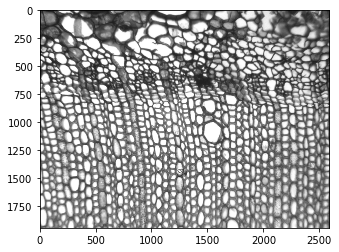

In [12]:
plt.imshow(gray_cv2,cmap="gray", vmin=0, vmax=255)

Hacer una binarización de la imágen. Probar dititntos filtros de la función threshold de cv2.

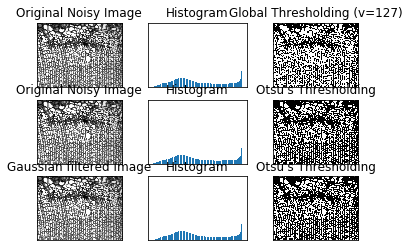

In [13]:
# global thresholding
ret1,th1 = cv.threshold(gray_cv2,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(gray_cv2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(gray_cv2,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [gray_cv2, 0, th1,
          gray_cv2, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

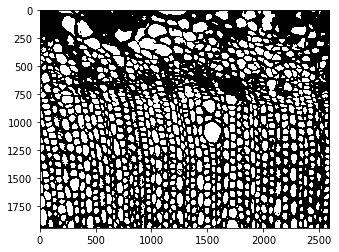

In [14]:
plt.imshow(th2,cmap="gray", vmin=0, vmax=255)

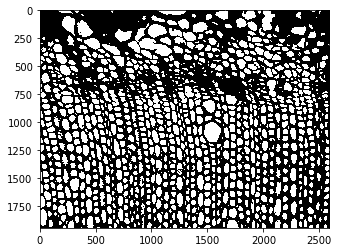

In [15]:
plt.imshow(th3,cmap="gray", vmin=0, vmax=255)

Con la función de bitwise se invierte el blanco por negro. Los centroides se definen de la ausenccia de color. Por eso es que se tiene que hacer la inversión.

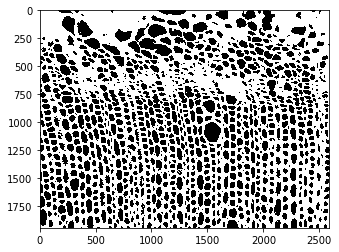

In [16]:
th2_2 = cv.bitwise_not(th2)
th3_2 = cv.bitwise_not(th3)
plt.imshow(th3_2,cmap="gray", vmin=0, vmax=255)

Aplicar el algortimo de adelgazamiento para ver como se ven los segmentos

In [17]:
smooth_th2_2 = cv.ximgproc.thinning(th2_2)
smooth_th3_2 = cv.ximgproc.thinning(th3_2)

Después de hacer el proceso de binarización vemos que no se definen bien los contornos de las células de la madera con las fotos tomadas en la cámara (). Pero con las fotos viejas si. Lo que se podría intentar es hacer una separación de los canales rojo y azul. Después juntarlos y hacer la binarización. 

In [18]:
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar1.jpg',th1)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar2.jpg',th2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar3.jpg',th3)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar1.jpg',th1)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar_inv2.jpg',th2_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar_inv3.jpg',th3_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar_inv2_smooth.jpg',smooth_th2_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_binar_inv3_smooth.jpg',smooth_th3_2)

True

Tratar de encontrar los centroides de los blobs en las imágenes. Los blobs son pixeles con ausencia de color. En este caso representan el centro de las células. El primer paso es definir los contornos de la imágen y despúes se calcula el centro de estos contornos. El canal blanco de la imagen es el contorno.
La función .findContours regresa un arreglo con arreglos de los distintos contornos que hay en la imágen.

In [19]:
# find contours in the thresholded image
#cnts = cv.findContours(th3_2, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
cnts,hierarchy=cv.findContours(smooth_th3_2,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
#cnts = imutils.grab_contours(cnts)
hierarchy.shape
print(hierarchy)

[[[  -1   -1    1   -1]
  [   2   -1   -1    0]
  [   3    1   -1    0]
  ...
  [1210   -1   -1 1208]
  [  -1 1209   -1 1208]
  [  -1 1208   -1    0]]]


Agregar los puntos de los centroides identificados previamente. Esto nos permitirá saber si la determinación de los centroides se esta realizando de la forma correcta.

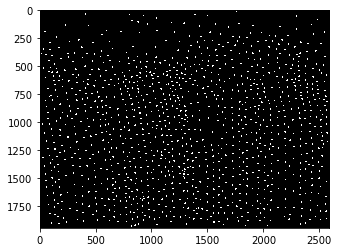

In [21]:
#make array of centroids
centroids=[]
#Array of areas
areas=[]
#Array for perimeters
perimeters=[]
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv.moments(c) #que es moments?¡¿
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    # draw the contour and center of the shape on the image
    cv.drawContours(smooth_th3_2, [c], -1, (0, 255, 0), 2)
    cv.circle(smooth_th3_2, (cX, cY), 7, (255, 255, 255), -1)
    centroids.append([cX, cY])
    areas.append(cv.contourArea(c))
    perimeters.append(cv.arcLength(c,True))

    #cv.putText(th2, "center", (cX - 20, cY - 20),cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # display the image
    #cv.imshow("Image", th2)
plt.imshow(smooth_th3_2,cmap="gray", vmin=0, vmax=255)

In [22]:
#cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_centroids.jpg',th3_2)
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_smooth_centroids.jpg',smooth_th3_2)

True

Con los centroides y los contornos se pueden calcular varios parámetros de las células. Por ejemplo, se podría explorar el índice de circularidad, tamaño de las células en pixeles, entre otras cosas.
Ahora vamos a hacer una técnica que permite conectar a cada célula con cada una de sus vecinas. 
Con ello se podrá calcular el índice de vecinidad y además se podría explorar una forma de seguir la serie de células de una inicial. Primero realizaremos la triangulación de Delauny con la función Delaunay de scipy.

In [23]:
from numpy import savetxt
print(len(areas),len(cnts), len(centroids))
np.savetxt('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_areas.csv', areas, delimiter=',')
np.savetxt('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_centroids.csv', centroids, delimiter=',')
np.savetxt('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_perimeters.csv', perimeters, delimiter=',')
#np.savetxt('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_cnts.csv', cnts, delimiter=',')


1212 1212 1212


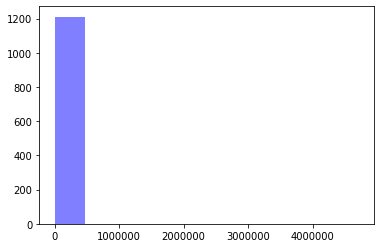

In [24]:
num_bins = 10
n, bins, patches = plt.hist(areas, num_bins, facecolor='blue', alpha=0.5)
plt.show()

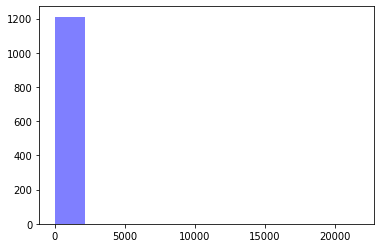

In [25]:
n, bins, patches = plt.hist(perimeters, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [37]:
size=smooth_th3_2.shape

r = (0, 0, size[1], size[0])
print(rect)

# Check if a point is inside a rectangle
def rect_contains(r, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

(0, 0, 2592, 1944)


In [38]:
# Create an instance of Subdiv2D
subdiv = cv.Subdiv2D(rect)
#Insert points into subdiv
for p in centroids:
    subdiv.insert(tuple(p))


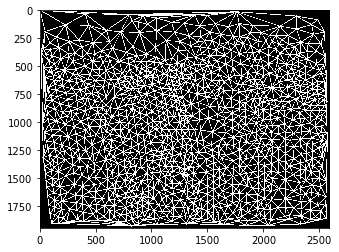

In [40]:
triangleList = subdiv.getTriangleList()

for t in triangleList:
    pt1 = (t[0], t[1])
    pt2 = (t[2], t[3])
    pt3 = (t[4], t[5])
    if rect_contains(rect, pt1) and rect_contains(rect, pt2) and rect_contains(rect, pt3) :
        cv.line(smooth_th3_2, pt1, pt2, (255,255,0), 5)
        cv.line(smooth_th3_2, pt2, pt3, (255,255, 0), 5)
        cv.line(smooth_th3_2, pt3, pt1, (255,255, 0), 5)
        
plt.imshow(smooth_th3_2,cmap="gray", vmin=0, vmax=255)        

In [41]:
cv.imwrite('../Data/Pedilanthus/P_tithymaloides/EPM6_S2_10x_smooth_triangulation.jpg',smooth_th3_2)

True

In [42]:
from scipy.spatial import Delaunay
centroids=np.array(centroids)
tri = Delaunay(centroids)

In [43]:
print(len(tri.simplices))
print(centroids)

2359
[[1296  975]
 [2039 1920]
 [ 820 1925]
 ...
 [   0    0]
 [   0    0]
 [ 405   34]]


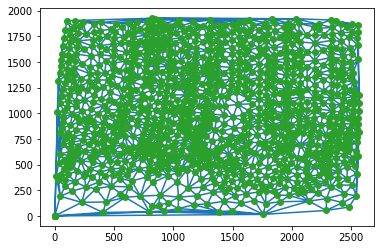

<Figure size 432x288 with 0 Axes>

In [44]:
plt.triplot(centroids[:,0], centroids[:,1], tri.simplices.copy())
plt.plot(centroids[:,0], centroids[:,1], 'o')
plt.show()
plt.savefig('triangulation.png')

Como se puede ver en la figura previa, tenemos a los centroides conectados en triángulos que representan la vecinidad de la células. La técnica está fallando en triangular los puntos que se encuentran en las orillas. Ya que une puntos muy lejanos que en realidad no son células vecinas. Tratar de ploteat la triangulación sobre la imágen binarizada y con centroides. Además se correrá la triangulación de delauny con las funciones de cv2.

AttributeError: 'function' object has no attribute 'Triangulation'

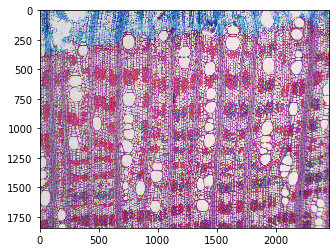

In [4]:
img_m = plt.imread('../Data/Mappia_photos/mappia_4x_0005.tif')
plt.imshow(img_m)
#Se puede crear un arreglo de img_1 con np.asarray
img_m_array = np.asarray(img_m)

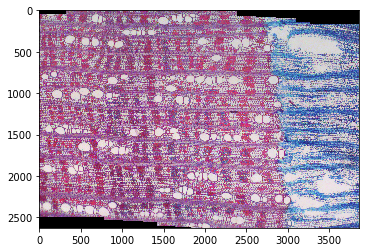

In [6]:
img_mt = plt.imread('../Data/Mappia_photos/conjunta_4x.tif')
plt.imshow(img_mt)
#Se puede crear un arreglo de img_1 con np.asarray
img_mt_array = np.asarray(img_mt)

In [8]:
img_m.shape


(1842, 2456, 3)

In [9]:
img_mt.shape

(2626, 3858, 3)

(array([1162785.,  658280., 2017908., 2413654., 3355863., 4722400.,
        5454292., 4803886., 5095966.,  708290.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

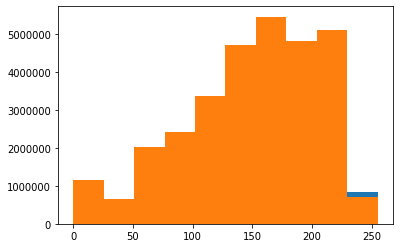

In [16]:
type(img_m_array)
type(img_m)
plt.hist(img_m_array.ravel())
plt.hist(img_mt_array.ravel())

(array([  91958.,  371348.,  819670., 1048714., 1456010., 2037444.,
        2418095., 2243854., 2247944.,  836819.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

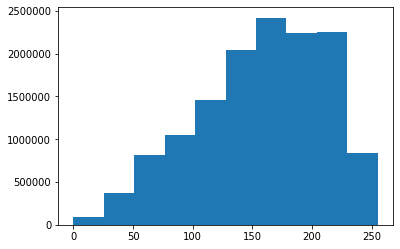

In [18]:
img_cv2_m = cv.imread('../Data/Mappia_photos/mappia_4x_0005.tif')
img_cv2_m.shape
img_cv2_mt = cv.imread('../Data/Mappia_photos/conjunta_4x.tif')
#r,g,b = cv.split(img_cv2)
cv.imshow("img,cv2",img_cv2_m)
cv.waitKey(1000)
cv.destroyAllWindows()
plt.hist(img_cv2_m.ravel())
